<a href="https://colab.research.google.com/github/CyWP/C473_F23/blob/main/c473_f23_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies and modules

In [27]:
!pip install sh

In [56]:
import numpy as np
import struct
import urllib.request
import matplotlib.pyplot as plt
import os
import random
from sh import gunzip

Downloading and unpacking dataset

In [52]:
urls = ["http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
                "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"]
filenames = ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz", "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]
for i in range(len(urls)):
  if not(os.path.isfile(filenames[i][:-3])):
    filename, headers = urllib.request.urlretrieve(urls[i], filename=filenames[i])
    gunzip(filenames[i])
  filenames[i]=filenames[i][:-3]

Parsing data set files

In [54]:
with open(filenames[0],'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    img_train = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    img_train = img_train.reshape((size, nrows, ncols))

with open(filenames[1],'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    label_train = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    label_train = label_train.reshape((size,))

with open(filenames[2],'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    img_test = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    img_test = img_test.reshape((size, nrows, ncols))

with open(filenames[3],'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    label_test = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    label_test = label_test.reshape((size,))

Cursory visual test of image and label correspondence to ensure proper parsing

Testing data and labels at index 16307:
Label: 1
Image:


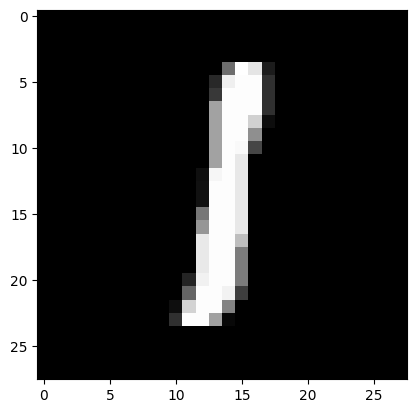




Testing data and labels at index 56853:
Label: 4
Image:


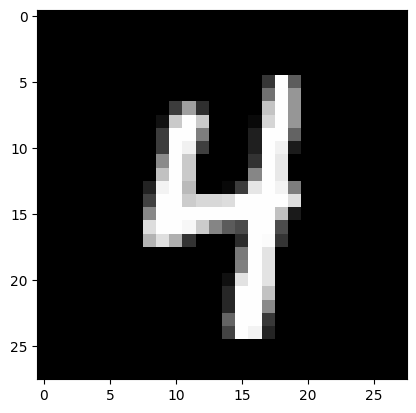




Testing data and labels at index 55692:
Label: 2
Image:


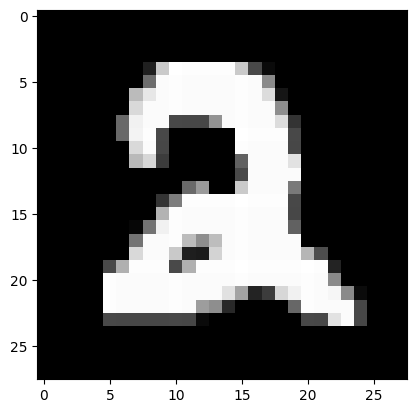




Testing data and labels at index 7666:
Label: 3
Image:


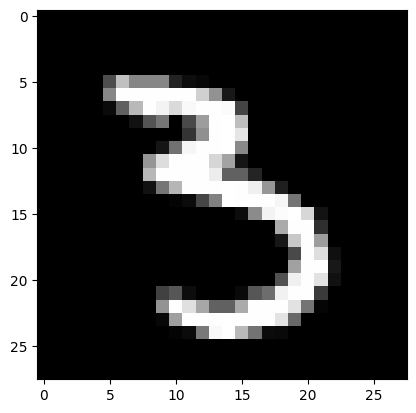




Testing data and labels at index 27149:
Label: 6
Image:


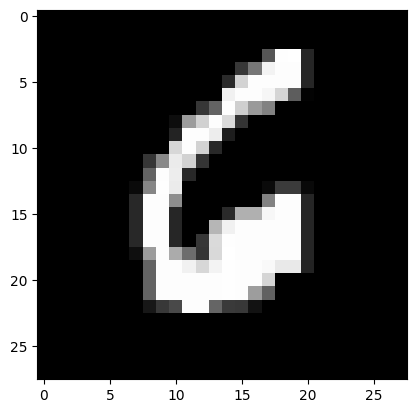

In [59]:
for i in range(5):
  j = random.randint(0, len(label_train))
  print(f"Testing data and labels at index {j}:")
  print(f"Label: {label_train[j]}\nImage:")
  plt.imshow(img_train[j,:,:], cmap='gray')
  plt.show()
  print("\n\n")